In [1]:
import pandas as pd
import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

C:\Users\Abhishek\Anaconda2\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
train = pd.read_csv('./data/train.csv', index_col='id', encoding="ISO-8859-1")
test = pd.read_csv('./data/test.csv', index_col='id', encoding="ISO-8859-1")

products_description = pd.read_csv('./data/product_descriptions.csv')
products_attributes = pd.read_csv('./data/attributes.csv')

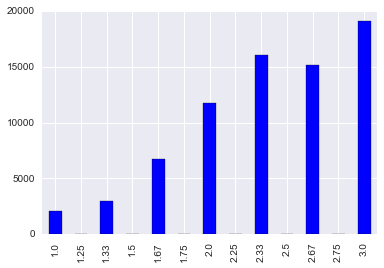

In [4]:
# class distribution
train.relevance.value_counts().sort_index().plot(kind='bar');

In [5]:
products_attributes.head()

,product_uid,name,value
0,100001,Bullet01,Versatile connector for various 90° connection...
1,100001,Bullet02,Stronger than angled nailing or screw fastenin...
2,100001,Bullet03,Help ensure joints are consistently straight a...
3,100001,Bullet04,Dimensions: 3 in. x 3 in. x 1-1/2 in.
4,100001,Bullet05,Made from 12-Gauge steel


In [6]:
train.head()

,product_uid,product_title,search_term,relevance
id,,,,
2,100001,Simpson Strong-Tie 12-Gauge Angle,angle bracket,3.00
3,100001,Simpson Strong-Tie 12-Gauge Angle,l bracket,2.50
9,100002,BEHR Premium Textured DeckOver 1-gal. #SC-141 ...,deck over,3.00
16,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,rain shower head,2.33
17,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,shower only faucet,2.67


In [7]:
products_description.head()

,product_uid,product_description
0,100001,"Not only do angles make joints stronger, they ..."
1,100002,BEHR Premium Textured DECKOVER is an innovativ...
2,100003,Classic architecture meets contemporary design...
3,100004,The Grape Solar 265-Watt Polycrystalline PV So...
4,100005,Update your bathroom with the Delta Vero Singl...


In [8]:
# merge datasets
train_merged = pd.merge(train, products_description, how='left', on='product_uid')
test_merged = pd.merge(test, products_description, how='left', on='product_uid')

In [9]:
# count how many times a search term is present in product description

def get_num_times_match(search_terms, description):
    return sum(int(description.find(word)>=0) for word in search_terms.split())

train_merged['count_search_terms'] = train_merged.apply(lambda x: get_num_times_match(x['search_term'], x['product_description']), axis=1)
train_merged['count_search_terms_by_length'] = train_merged.apply(lambda x: x['count_search_terms'] * 1. / len(x['search_term'].split()), axis=1)
train_merged['query_count'] = train_merged.search_term.map(lambda x: len(x.split()))

In [10]:
train_merged[['count_search_terms', 'count_search_terms_by_length', 'relevance']]

,count_search_terms,count_search_terms_by_length,relevance
0,1,0.500000,3.00
1,1,0.500000,2.50
2,2,1.000000,3.00
3,0,0.000000,2.33
4,1,0.333333,2.67
5,1,0.500000,3.00
6,2,0.666667,2.67
7,0,0.000000,3.00
8,1,0.500000,2.67
9,1,0.500000,3.00


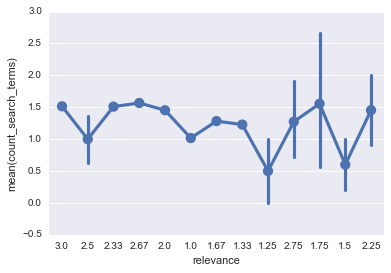

In [11]:
sns.pointplot(x='relevance', y='count_search_terms', data=train_merged);

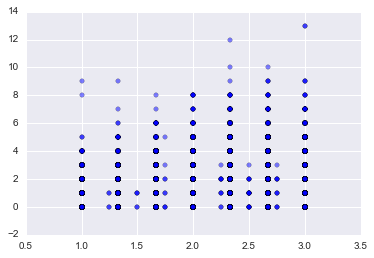

In [12]:
plt.scatter(train_merged.relevance, train_merged.count_search_terms, alpha=.5);

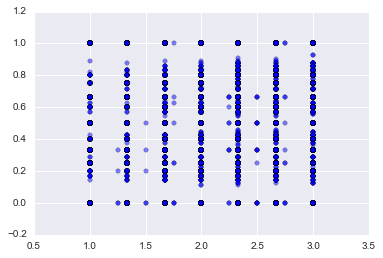

In [13]:
plt.scatter(train_merged.relevance, train_merged.count_search_terms_by_length, alpha=.5);

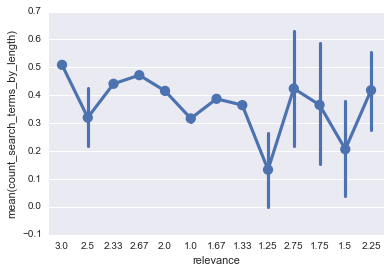

In [14]:
sns.pointplot(x='relevance', y='count_search_terms_by_length', data=train_merged);

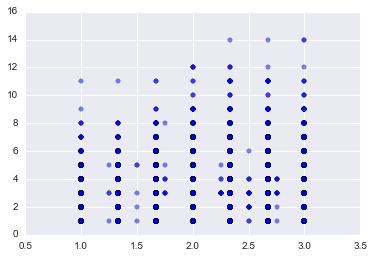

In [15]:
plt.scatter(train_merged.relevance, train_merged.query_count, alpha=.5);

## Lexical Diversity

In [17]:
from __future__ import division

In [30]:
def lexical_diversity(text):
    """
    Measures lexical richness of the document
    """
    return len(set(text.split())) / len(text.split())

In [31]:
product_titles_text = ' '.join(train_merged.product_title)
product_description_text = ' '.join(train_merged.product_description)

In [32]:
print 'Lexical Richness of product titles is %f ' %(lexical_diversity(product_titles_text))
print 'Lexical Richness of product description is %f ' %(lexical_diversity(product_description_text))

Lexical Richness of product titles is 0.033757 
Lexical Richness of product description is 0.029077 


** Number of distinct words is just 3% of the total number of words in product title and just 2.9 % in the product description.**

### Remove stopwords and normalize strings

In [ ]:
def remove_stopwords(text):
    """
    Remove stopwords
    """